In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

In [2]:
def comparison_plot(value_name, mode="top", output="no"):
    if value_name == "J":
        ylabel = "J(y,u)"
        title = "Evolution of cost functional"
    elif value_name == "dJ":
        ylabel = r"$\int_{\partial \Omega} (2\lambda u_n - \alpha p_n)\, v_n \;\mathrm{d}s$"
        title = r"$\mathrm{d}J(u_n)(v_n)$"
    elif value_name == "stepsize":
        ylabel = r"$s_n/t_n$"
        title = "Stepsize"
    df_cg = pd.read_csv(f"data\CG-{mode}.csv", index_col=0)
    df_pg = pd.read_csv(f"data\PG-{mode}.csv", index_col=0)
    
    plt.plot(df_cg[value_name], "x-", label="Conditioned Gradient")
    plt.plot(df_pg[value_name], "x-", label="Projected Gradient")
    plt.legend()
    plt.xlabel("Number of iterations")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    if output != "no":
        plt.savefig(output)
    plt.show()

In [3]:
value_names = ["J", "dJ", "stepsize"]

## $\alpha$ only set on top boundary

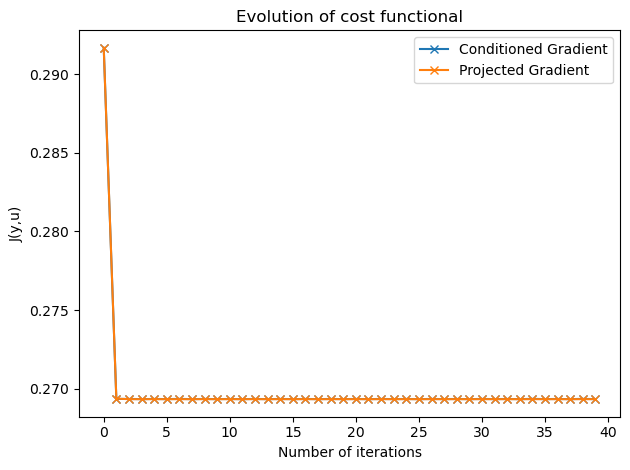

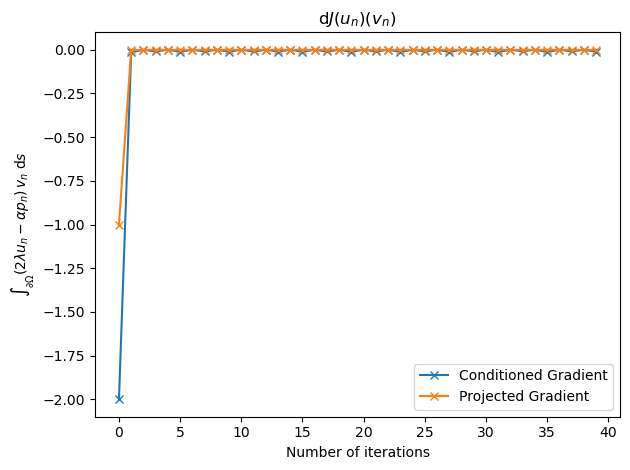

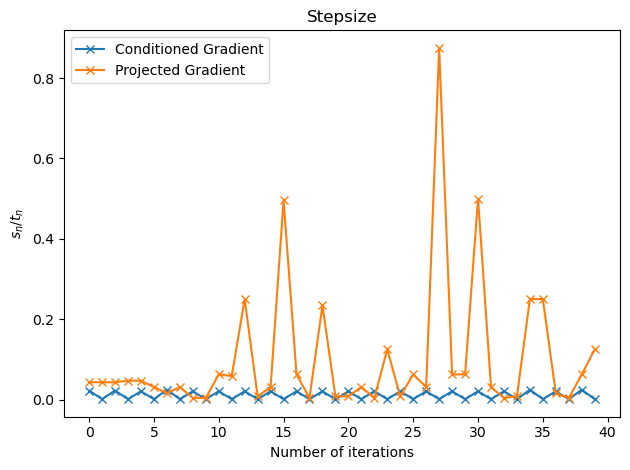

In [4]:
mode = "top"
for value_name in value_names:
    comparison_plot(value_name, mode, output=f"plots/{value_name}-{mode}.svg")

## $\alpha$ set on whole boundary

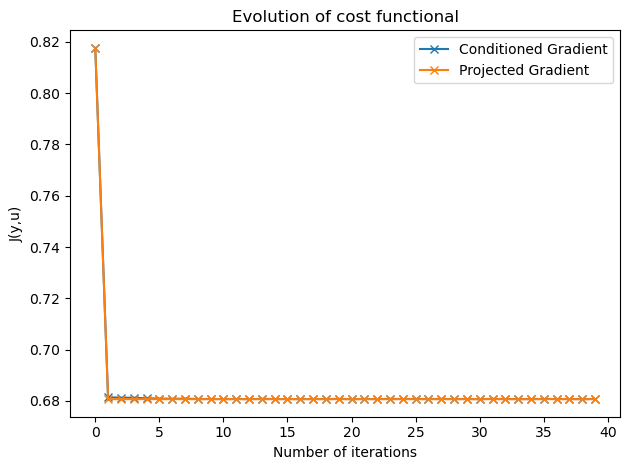

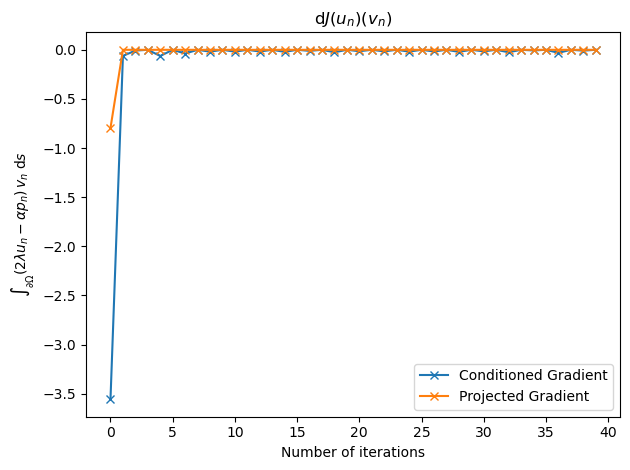

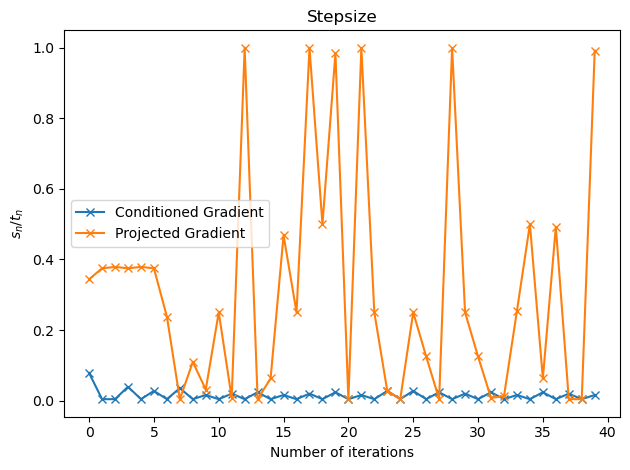

In [5]:
mode = "all"
for value_name in value_names:
    comparison_plot(value_name, mode, output=f"plots/{value_name}-{mode}.svg")

## Bang-bang control

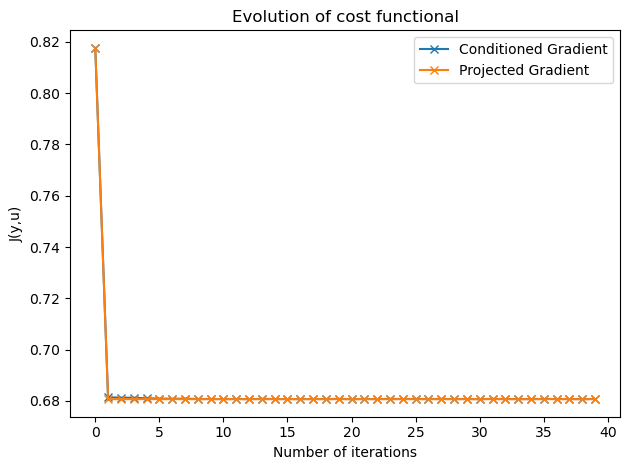

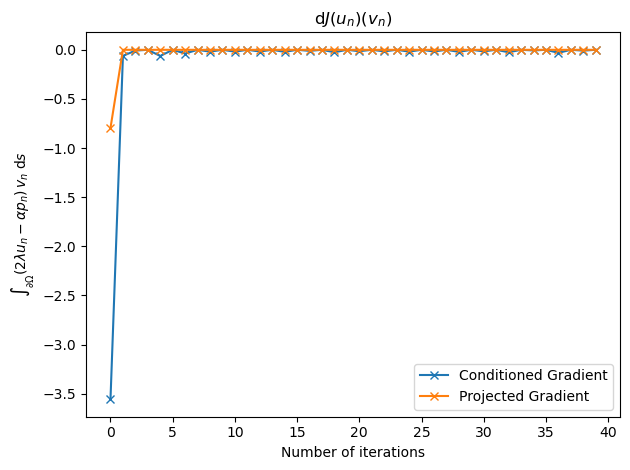

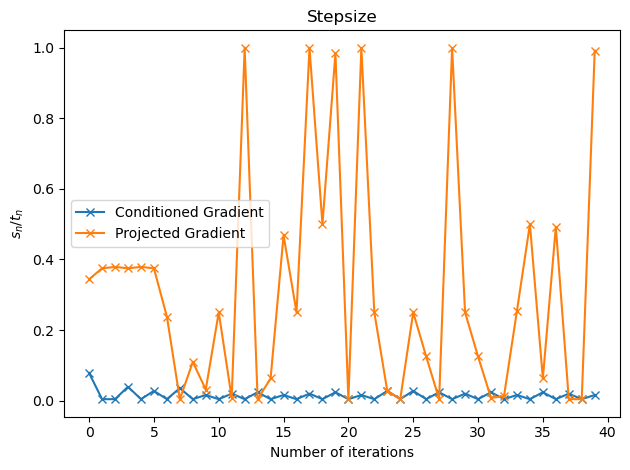

In [6]:
mode = "bang_bang"
mode = "all"
for value_name in value_names:
    comparison_plot(value_name, mode, output=f"plots/{value_name}-{mode}.svg")